## 1. import libraries

In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
from sklearn import model_selection
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.mobilenet import MobileNet
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Rescaling, Input, Add, Activation, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Lambda, Input, Conv2D, BatchNormalization, MaxPooling2D, Concatenate
from tensorflow.keras.optimizers import Adam , SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet101
from keras.applications.resnet import ResNet152
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.xception import Xception
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.nasnet import NASNetLarge
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
import os
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from copy import deepcopy

import argparse

import numpy as np
import pandas as pd

import io
import os
import tensorflow as tf

from PIL import Image
from glob import glob
import itertools

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, BatchNormalization, Dropout, Dense, MaxPool2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
#from tensorflow_addons.optimizers import SGDW , AdamW , COCOB
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Rescaling, Input, Add, Activation, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score , roc_auc_score , cohen_kappa_score , matthews_corrcoef ,jaccard_score

## 2 . importing Image

In [29]:
data=pd.read_csv("full_sample/Data_Entry_v2020.csv")

In [30]:
import glob
 
directory = 'full_sample'
 
image=[]
for img in glob.iglob(f'{directory}/*/*/*'):
    print(img)
    image.append(img)

full_sample\images_001\images\00000001_000.png
full_sample\images_001\images\00000001_001.png
full_sample\images_001\images\00000001_002.png
full_sample\images_001\images\00000002_000.png
full_sample\images_001\images\00000003_000.png
full_sample\images_001\images\00000003_001.png
full_sample\images_001\images\00000003_002.png
full_sample\images_001\images\00000003_003.png
full_sample\images_001\images\00000003_004.png
full_sample\images_001\images\00000003_005.png
full_sample\images_001\images\00000003_006.png
full_sample\images_001\images\00000003_007.png
full_sample\images_001\images\00000004_000.png
full_sample\images_001\images\00000005_000.png
full_sample\images_001\images\00000005_001.png
full_sample\images_001\images\00000005_002.png
full_sample\images_001\images\00000005_003.png
full_sample\images_001\images\00000005_004.png
full_sample\images_001\images\00000005_005.png
full_sample\images_001\images\00000005_006.png
full_sample\images_001\images\00000005_007.png
full_sample\i

In [31]:
my_glob = glob.iglob('full_sample/images*/images/*.png')
full_img_paths = {os.path.basename(x): x for x in my_glob}
data['full_path'] = data['Image Index'].map(full_img_paths.get)

In [32]:
data.sample(10)

Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
106365  00028644_008.png     No Finding            8       28644           38   
101889  00027097_000.png     No Finding            0       27097           59   
52515   00013249_039.png   Infiltration           39       13249           14   
12239   00003190_022.png   Pneumothorax            9        3190           44   
94338   00024129_000.png     No Finding            0       24129           48   
57701   00014298_001.png         Nodule            1       14298           42   
23084   00006102_003.png    Atelectasis            3        6102           54   
82751   00020326_101.png   Infiltration          101       20326           27   
53854   00013594_036.png           Mass           35       13594           47   
58801   00014552_001.png     No Finding            1       14552           10   

       Patient Gender View Position  OriginalImage[Width  Height]  \
106365              M            PA                 2021     2021   
101889              F            PA                 2542     2357   
52515               M            AP                 2048     2500   
12239               F            AP                 2500     2048   
94338               M            PA                 2500     2048   
57701               F            PA                 2682     2625   
23084               M            PA                 2500     2048   
82751               F            AP                 2996     2544   
53854               M            AP                 2500     2048   
58801               M            PA                 2462     1977   

        OriginalImagePixelSpacing[x        y]  \
106365                     0.194311  0.194311   
101889                     0.143000  0.143000   
52515                      0.168000  0.168000   
12239                      0.168000  0.168000   
94338                      0.168000  0.168000   
57701                      0.143000  0.143000   
23084                      0.168000  0.168000   
82751                      0.139000  0.139000   
53854                      0.168000  0.168000   
58801                      0.143000  0.143000   

                                             full_path  
106365  full_sample\images_012\images\00028644_008.png  
101889  full_sample\images_011\images\00027097_000.png  
52515   full_sample\images_006\images\00013249_039.png  
12239   full_sample\images_002\images\00003190_022.png  
94338   full_sample\images_010\images\00024129_000.png  
57701   full_sample\images_007\images\00014298_001.png  
23084   full_sample\images_003\images\00006102_003.png  
82751   full_sample\images_009\images\00020326_101.png  
53854   full_sample\images_006\images\00013594_036.png  
58801   full_sample\images_007\images\00014552_001.png

In [33]:
labels=[x.split("|") for x in list(data['Finding Labels'])]

In [34]:
unique={}
counter=0
for x in labels:
    for y in x:
        if y in unique:
            unique[y]+=1
        else:
            unique[y]=1
        counter+=1
ss=[[x,unique[x]] for x in unique]
logs=sorted(ss,key=lambda x:x[1])
print(logs)

[['Hernia', 227], ['Pneumonia', 1431], ['Fibrosis', 1686], ['Edema', 2303], ['Emphysema', 2516], ['Cardiomegaly', 2776], ['Pleural_Thickening', 3385], ['Consolidation', 4667], ['Pneumothorax', 5302], ['Mass', 5782], ['Nodule', 6331], ['Atelectasis', 11559], ['Effusion', 13317], ['Infiltration', 19894], ['No Finding', 60361]]


In [35]:
data.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  \
0                        0.143  0.143   
1                        0.143  0.143   
2                        0.168  0.168   
3                        0.171  0.171   
4                        0.168  0.168   

                                        full_path  
0  full_sample\images_001\images\00000001_000.png  
1  full_sample\images_001\images\00000001_001.png  
2  full_sample\images_001\images\00000001_002.png  
3  full_sample\images_001\images\00000002_000.png  
4  full_sample\images_001\images\00000003_001.png

In [36]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    data[pathology] = data['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
    
data['No Findings'] = data['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

In [37]:
data.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x  ...  Pneumothorax Atelectasis  \
0                        0.143  ...             0           0   
1                        0.143  ...             0           0   
2                        0.168  ...             0           0   
3                        0.171  ...             0           0   
4                        0.168  ...             0           0   

   Pleural_Thickening  Mass  Edema  Consolidation  Infiltration  Fibrosis  \
0                   0     0      0              0             0         0   
1                   0     0      0              0             0         0   
2                   0     0      0              0             0         0   
3                   0     0      0              0             0         0   
4                   0     0      0              0             0         0   

   Pneumonia  No Findings  
0          0            0  
1          0            0  
2          0            0  
3          0            1  
4          0            0  

[5 rows x 27 columns]

In [38]:
df = data.drop(list(data.iloc[:,1:11].columns.values),axis = 1)
df.head()

Image Index                                       full_path  \
0  00000001_000.png  full_sample\images_001\images\00000001_000.png   
1  00000001_001.png  full_sample\images_001\images\00000001_001.png   
2  00000001_002.png  full_sample\images_001\images\00000001_002.png   
3  00000002_000.png  full_sample\images_001\images\00000002_000.png   
4  00000003_001.png  full_sample\images_001\images\00000003_001.png   

   Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  Pneumothorax  \
0             1          0         0       0       0             0   
1             1          1         0       0       0             0   
2             1          0         1       0       0             0   
3             0          0         0       0       0             0   
4             0          0         0       1       0             0   

   Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  Infiltration  \
0            0                   0     0      0              0             0   
1            0                   0     0      0              0             0   
2            0                   0     0      0              0             0   
3            0                   0     0      0              0             0   
4            0                   0     0      0              0             0   

   Fibrosis  Pneumonia  No Findings  
0         0          0            0  
1         0          0            0  
2         0          0            0  
3         0          0            1  
4         0          0            0

In [39]:
df_clear=df.where(df["No Findings"]==0)

In [40]:
df_clear.dropna(inplace=True)
df_clear.drop("No Findings",axis=1,inplace=True)

In [41]:
df_clear.count()

Image Index           51759
full_path             51759
Cardiomegaly          51759
Emphysema             51759
Effusion              51759
Hernia                51759
Nodule                51759
Pneumothorax          51759
Atelectasis           51759
Pleural_Thickening    51759
Mass                  51759
Edema                 51759
Consolidation         51759
Infiltration          51759
Fibrosis              51759
Pneumonia             51759
dtype: int64

In [42]:
df_clear.head()

Image Index                                       full_path  \
0  00000001_000.png  full_sample\images_001\images\00000001_000.png   
1  00000001_001.png  full_sample\images_001\images\00000001_001.png   
2  00000001_002.png  full_sample\images_001\images\00000001_002.png   
4  00000003_001.png  full_sample\images_001\images\00000003_001.png   
5  00000003_002.png  full_sample\images_001\images\00000003_002.png   

   Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  Pneumothorax  \
0           1.0        0.0       0.0     0.0     0.0           0.0   
1           1.0        1.0       0.0     0.0     0.0           0.0   
2           1.0        0.0       1.0     0.0     0.0           0.0   
4           0.0        0.0       0.0     1.0     0.0           0.0   
5           0.0        0.0       0.0     1.0     0.0           0.0   

   Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  Infiltration  \
0          0.0                 0.0   0.0    0.0            0.0           0.0   
1          0.0                 0.0   0.0    0.0            0.0           0.0   
2          0.0                 0.0   0.0    0.0            0.0           0.0   
4          0.0                 0.0   0.0    0.0            0.0           0.0   
5          0.0                 0.0   0.0    0.0            0.0           0.0   

   Fibrosis  Pneumonia  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
4       0.0        0.0  
5       0.0        0.0

In [43]:
target_cols = df_clear.drop(['Image Index','full_path'], axis=1).columns.to_list()
target_cols

['Cardiomegaly',
 'Emphysema',
 'Effusion',
 'Hernia',
 'Nodule',
 'Pneumothorax',
 'Atelectasis',
 'Pleural_Thickening',
 'Mass',
 'Edema',
 'Consolidation',
 'Infiltration',
 'Fibrosis',
 'Pneumonia']

## 3. model

In [44]:
class AUCMarginLoss(tf.keras.losses.Loss):
    def __init__(self, margin=0.1, **kwargs):
        super(AUCMarginLoss, self).__init__(**kwargs)
        self.margin = margin
    
    def call(self, y_true, y_pred):
        pos_mask = tf.equal(y_true, 1)
        neg_mask = tf.equal(y_true, 0)
        pos_pred = tf.boolean_mask(y_pred, pos_mask)
        neg_pred = tf.boolean_mask(y_pred, neg_mask)
        
        num_pos_pairs = tf.cast(tf.shape(pos_pred)[0] * tf.shape(neg_pred)[0], dtype=y_pred.dtype)
        num_neg_pairs = tf.cast(tf.shape(neg_pred)[0] * tf.shape(pos_pred)[0], dtype=y_pred.dtype)
        
        pos_diff = tf.expand_dims(pos_pred, axis=1) - tf.expand_dims(neg_pred, axis=0)
        neg_diff = tf.expand_dims(neg_pred, axis=1) - tf.expand_dims(pos_pred, axis=0)
        
        pos_loss = tf.reduce_sum(tf.nn.relu(pos_diff + self.margin))
        neg_loss = tf.reduce_sum(tf.nn.relu(neg_diff + self.margin))
        
        loss = (pos_loss / num_pos_pairs) + (neg_loss / num_neg_pairs)
        
        return loss

In [45]:
class F1Loss(tf.keras.losses.Loss):
    def __init__(self, epsilon=1e-7, **kwargs):
        super(F1Loss, self).__init__(**kwargs)
        self.epsilon = epsilon
    
    def call(self, y_true, y_pred):
        tp = tf.reduce_sum(y_true * y_pred, axis=1)
        fp = tf.reduce_sum((1 - y_true) * y_pred, axis=1)
        fn = tf.reduce_sum(y_true * (1 - y_pred), axis=1)
        
        precision = tp / (tp + fp + self.epsilon)
        recall = tp / (tp + fn + self.epsilon)
        
        f1_score = 2 * precision * recall / (precision + recall + self.epsilon)
        f1_loss = 1 - f1_score
        
        return f1_loss

In [46]:
def focal_loss(gamma=2.0, alpha=0.25):
    def loss_fn(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1.0 - K.epsilon())
        pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        ce_loss = -K.log(pt)
        fl_loss = alpha * K.pow(1 - pt, gamma) * ce_loss
        loss = K.sum(fl_loss, axis=1)
        return loss
    return loss_fn

In [47]:
import keras.backend as K

In [48]:
def get_transfer_learning_model(name, input_shape,weights='imagenet',loss='binary_crossentropy',opt_no=0):
    if name =='VGG16':
        base_model = VGG16(input_shape=input_shape, weights=weights, include_top=False, pooling='avg')

    elif name =='resnet101':
        base_model = ResNet101(input_shape=input_shape, include_top=False, weights=weights)
        
    elif name == 'resnet50V2':
        
        base_model = ResNet50(input_shape=input_shape, include_top=False, weights=weights)
        
    elif name == 'inception_v3':
        
        base_model = InceptionV3(input_shape=input_shape, include_top=False, weights=weights, pooling='avg')

    elif name == 'inception_resnet_v2':
        
        base_model = InceptionResNetV2(input_shape=input_shape, include_top=False, weights=weights, pooling='avg')

    elif name == 'xception':
        
        base_model = Xception(input_shape=input_shape, include_top=False, weights=weights, pooling='avg')
        
    elif name == 'densenet121':
        
        base_model = DenseNet121(input_shape=input_shape, include_top=False, weights=weights)

    elif name == 'mobilenetv2':
        
        base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights=weights, pooling='avg')

    elif name=='EfficientNetB7':

        base_model=EfficientNetB7(include_top=False, weights=weights, input_shape=input_shape)

    elif name=='NASNetLarge':

        base_model=NASNetLarge(include_top=False, weights=None, input_shape=input_shape, pooling='avg')


    for layer in base_model.layers:
        layer.trainable = True

    x=base_model.output
    x= GlobalAveragePooling2D()(x)
    predictions = Dense(3, activation='sigmoid',kernel_regularizer=l2(1e-4),bias_regularizer=l2(1e-4))(x)

    
    model=Model(base_model.input,outputs=predictions)
    loss=loss
    
    if opt_no==0:
        opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    elif opt_no==1:
        opt = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
    else:
        opt=COCOB
    model.compile(optimizer=opt,
                  loss=loss,
                  metrics=["accuracy",tf.keras.metrics.AUC(multi_label=True),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()],
                  )

    return model

In [49]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51759 entries, 0 to 112115
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image Index         51759 non-null  object 
 1   full_path           51759 non-null  object 
 2   Cardiomegaly        51759 non-null  float64
 3   Emphysema           51759 non-null  float64
 4   Effusion            51759 non-null  float64
 5   Hernia              51759 non-null  float64
 6   Nodule              51759 non-null  float64
 7   Pneumothorax        51759 non-null  float64
 8   Atelectasis         51759 non-null  float64
 9   Pleural_Thickening  51759 non-null  float64
 10  Mass                51759 non-null  float64
 11  Edema               51759 non-null  float64
 12  Consolidation       51759 non-null  float64
 13  Infiltration        51759 non-null  float64
 14  Fibrosis            51759 non-null  float64
 15  Pneumonia           51759 non-null  float64
dtypes: float

In [50]:
df_clear.sample(10)

Image Index                                       full_path  \
40791   00010583_003.png  full_sample\images_005\images\00010583_003.png   
15392   00004010_000.png  full_sample\images_003\images\00004010_000.png   
49700   00012620_002.png  full_sample\images_006\images\00012620_002.png   
54408   00013655_003.png  full_sample\images_006\images\00013655_003.png   
111614  00030561_018.png  full_sample\images_012\images\00030561_018.png   
103588  00027649_002.png  full_sample\images_011\images\00027649_002.png   
34714   00009144_001.png  full_sample\images_004\images\00009144_001.png   
12941   00003392_016.png  full_sample\images_002\images\00003392_016.png   
68327   00016864_000.png  full_sample\images_008\images\00016864_000.png   
36554   00009637_000.png  full_sample\images_005\images\00009637_000.png   

        Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  Pneumothorax  \
40791            0.0        0.0       0.0     0.0     1.0           0.0   
15392            1.0        0.0       0.0     0.0     0.0           0.0   
49700            0.0        0.0       1.0     0.0     0.0           0.0   
54408            0.0        0.0       0.0     0.0     1.0           0.0   
111614           0.0        0.0       1.0     0.0     0.0           0.0   
103588           0.0        0.0       0.0     0.0     0.0           0.0   
34714            0.0        0.0       1.0     0.0     0.0           0.0   
12941            0.0        0.0       0.0     0.0     0.0           0.0   
68327            0.0        0.0       0.0     0.0     0.0           0.0   
36554            0.0        0.0       0.0     0.0     0.0           0.0   

        Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  \
40791           0.0                 0.0   0.0    0.0            0.0   
15392           0.0                 0.0   0.0    0.0            0.0   
49700           0.0                 0.0   0.0    1.0            0.0   
54408           0.0                 0.0   0.0    0.0            0.0   
111614          0.0                 0.0   0.0    0.0            0.0   
103588          1.0                 0.0   0.0    0.0            0.0   
34714           0.0                 0.0   0.0    0.0            0.0   
12941           0.0                 0.0   0.0    0.0            0.0   
68327           1.0                 0.0   0.0    0.0            0.0   
36554           0.0                 0.0   0.0    0.0            0.0   

        Infiltration  Fibrosis  Pneumonia  
40791            0.0       0.0        0.0  
15392            0.0       0.0        0.0  
49700            0.0       0.0        0.0  
54408            0.0       0.0        0.0  
111614           0.0       0.0        0.0  
103588           0.0       0.0        0.0  
34714            1.0       0.0        0.0  
12941            1.0       0.0        0.0  
68327            0.0       0.0        0.0  
36554            1.0       1.0        0.0

In [51]:
df_clear.iloc[:, 2:16] = df_clear.iloc[:, 2:16].astype(int)

In [52]:
df_clear.head()

Image Index                                       full_path  \
0  00000001_000.png  full_sample\images_001\images\00000001_000.png   
1  00000001_001.png  full_sample\images_001\images\00000001_001.png   
2  00000001_002.png  full_sample\images_001\images\00000001_002.png   
4  00000003_001.png  full_sample\images_001\images\00000003_001.png   
5  00000003_002.png  full_sample\images_001\images\00000003_002.png   

   Cardiomegaly  Emphysema  Effusion  Hernia  Nodule  Pneumothorax  \
0           1.0        0.0       0.0     0.0     0.0           0.0   
1           1.0        1.0       0.0     0.0     0.0           0.0   
2           1.0        0.0       1.0     0.0     0.0           0.0   
4           0.0        0.0       0.0     1.0     0.0           0.0   
5           0.0        0.0       0.0     1.0     0.0           0.0   

   Atelectasis  Pleural_Thickening  Mass  Edema  Consolidation  Infiltration  \
0          0.0                 0.0   0.0    0.0            0.0           0.0   
1          0.0                 0.0   0.0    0.0            0.0           0.0   
2          0.0                 0.0   0.0    0.0            0.0           0.0   
4          0.0                 0.0   0.0    0.0            0.0           0.0   
5          0.0                 0.0   0.0    0.0            0.0           0.0   

   Fibrosis  Pneumonia  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
4       0.0        0.0  
5       0.0        0.0

In [53]:
dataset_club=df_clear

In [54]:
dataset_x=df_clear.loc[:,['full_path','Cardiomegaly','Emphysema','Hernia']]

In [55]:
#remove rows with all 0 in dataset_x
dataset_x=dataset_x[dataset_x.iloc[:,1:].any(axis=1)]

In [56]:
dataset_x.shape

(5464, 4)

In [57]:
float_columns = dataset_x.select_dtypes(include=['float64']).columns
print(float_columns)
# Convert float columns to int
dataset_x[float_columns] = dataset_x[float_columns].astype(int)

Index(['Cardiomegaly', 'Emphysema', 'Hernia'], dtype='object')


In [58]:
dataset_x.dtypes

full_path       object
Cardiomegaly     int32
Emphysema        int32
Hernia           int32
dtype: object

In [59]:
dataset_x.sample(10)

full_path  Cardiomegaly  \
67944  full_sample\images_008\images\00016785_006.png             0   
51409  full_sample\images_006\images\00012992_000.png             1   
28718  full_sample\images_004\images\00007501_002.png             0   
97993  full_sample\images_011\images\00025849_038.png             0   
10216  full_sample\images_002\images\00002649_013.png             0   
42373  full_sample\images_005\images\00010897_018.png             1   
33847  full_sample\images_004\images\00008871_001.png             1   
69434  full_sample\images_008\images\00017136_020.png             0   
16861  full_sample\images_003\images\00004526_017.png             1   
21284  full_sample\images_003\images\00005681_027.png             0   

       Emphysema  Hernia  
67944          1       0  
51409          0       0  
28718          1       0  
97993          1       0  
10216          1       0  
42373          0       0  
33847          0       0  
69434          0       1  
16861          0       0  
21284          1       0

In [60]:
dataset_x.shape

(5464, 4)

<Axes: >

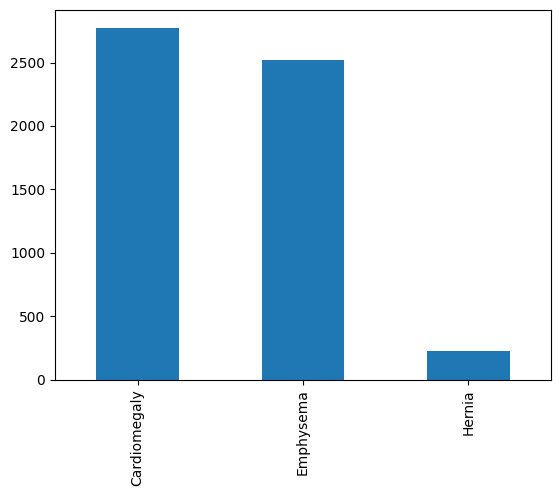

In [61]:

dataset_x.iloc[:,1:].sum().plot(kind='bar')


In [62]:
# sum of all rows in train_data
dataset_x.sum(axis = 0, skipna = True)

full_path       full_sample\images_001\images\00000001_000.png...
Cardiomegaly                                                 2776
Emphysema                                                    2516
Hernia                                                        227
dtype: object

In [63]:
seg = []
for x in ['Cardiomegaly','Emphysema','Hernia']:
    seg.append(dataset_x[dataset_x[x]==1])
data_premium = dataset_x
data_premium = dataset_x._append([seg[2]]*10, ignore_index=True)

In [64]:
data_premium.sum(axis = 0, skipna = True)

full_path       full_sample\images_001\images\00000001_000.png...
Cardiomegaly                                                 2846
Emphysema                                                    2556
Hernia                                                       2497
dtype: object

<Axes: >

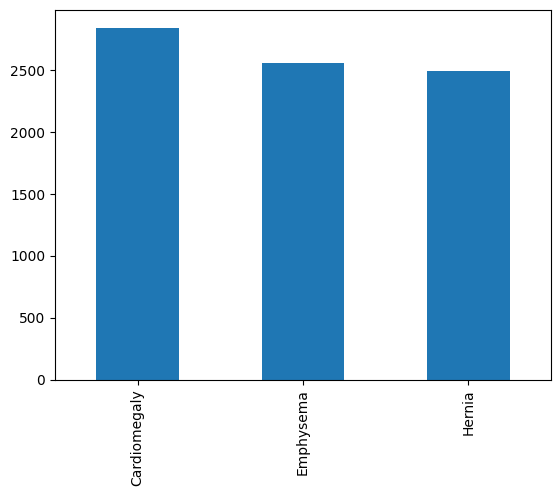

In [65]:
data_premium.iloc[:,1:].sum().plot(kind='bar')

In [66]:
train_data=data_premium.sample(frac=0.8,random_state=200)
test_data=data_premium.drop(train_data.index)

In [67]:
train_data.shape
test_data.shape

(6187, 4)

(1547, 4)

In [68]:
def generate_for(train_data,test_data):
    pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
    new_classes=['lung opacity','structural abnormalities','other abnormalities']
    class_3=['Cardiomegaly','Emphysema','Hernia']
    #if no==1:
    #    classes=['Atelectasis','Consolidation','Infiltration','Edema','Pneumonia']
    #elif no==2:
    #    classes=['Cardiomegaly','Pleural_Thickening','Effusion','Nodule','Mass']
    #else:
    #    classes=['Pneumothorax','Fibrosis','Emphysema','Hernia']
    train_dg=tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        rotation_range=24,
        horizontal_flip = True,
        vertical_flip=True,
    )
    test_dg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

    train_gen=train_dg.flow_from_dataframe(dataframe=train_data, 
                                            x_col="full_path", 
                                            y_col=class_3, 
                                            class_mode='raw',
                                            #color_mode='grayscale', 
                                            target_size=(256,256),
                                            batch_size=8,
                                            )

    test_gen = test_dg.flow_from_dataframe(dataframe = test_data,
                                            x_col="full_path",
                                            y_col=class_3,
                                            target_size=(256,256),
                                            #color_mode='grayscale', 
                                            shuffle=False,
                                            class_mode='raw',
                                            batch_size =8,
                                            )
    

    return train_gen,test_gen

In [69]:
train_gen,test_gen=generate_for(train_data,test_data)
y_true = test_gen.labels
y_true

Found 6187 validated image filenames.
Found 1547 validated image filenames.


array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [70]:
def fit_model(model,epochs=5):
    #x_train,x_test,y_train,y_test=get_datafor(disease)
    input_shape=(256,256,3)
    train_gen,test_gen=generate_for(data_premium,data_premium)
    filePath = f"models/#1/model-{model}_weights.hdf5"
    model=get_transfer_learning_model(model,input_shape,weights='imagenet')
    callbacks =[
        ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, verbose = 1,min_delta = 1e-4, min_lr = 1e-6, mode = 'min', cooldown=1),
        ModelCheckpoint(filepath=filePath,monitor = 'loss',verbose = 1, save_best_only = True, mode = 'min'),
        #EarlyStopping(monitor = 'loss', min_delta = 1e-4, patience = 5, mode = 'min', restore_best_weights = True, verbose = 1)
    ]
    return model.fit(train_gen,epochs=epochs,validation_data=test_gen,callbacks=[callbacks])

In [71]:
def plot_model(history):
    plt.figure(figsize = (12, 6))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot( history.history["loss"], label = "Training Loss", marker='o')
    plt.plot( history.history["val_loss"], label = "Validation Loss", marker='+')
    plt.grid(True)
    plt.legend()
    plt.show()

In [76]:
from tensorflow_addons.optimizers import AdamW,COCOB
from tensorflow.keras.optimizers import Adam,SGD

In [77]:
y_test=data_premium[["Cardiomegaly","Emphysema","Hernia"]]

In [78]:
y_train=data_premium[["Cardiomegaly","Emphysema","Hernia"]]

In [79]:
from tensorflow.keras import regularizers

In [80]:
def model(n,opt_val):
    model = Sequential()
    model.add(Dense(2048, input_dim=n, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3,activation='sigmoid'))
    loss='binary_crossentropy'
    
    if opt_val==1:
        opt = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    elif opt_val==2:
        opt = COCOB(alpha=100)
    else:
        opt = SGD(learning_rate=0.0001, momentum=0.9, nesterov=False)

    model.compile(optimizer=opt,
                  loss=loss,
                  metrics=["accuracy",tf.keras.metrics.AUC(multi_label=True),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()],
                  )

    return model

In [81]:
x_train1=pd.read_csv("csv/#X/resnet50_sel_feat.csv")

In [82]:
x_train2=pd.read_csv("csv/#X/resnet101_sel_feat.csv")

In [83]:
x_train1=x_train1.drop(["Unnamed: 0"],axis=1)
x_train2=x_train2.drop(["Unnamed: 0"],axis=1)

In [84]:
x_train1.shape
x_train2.shape

(7734, 1689)

(7734, 1463)

In [85]:
X_train_main=pd.concat([x_train1,x_train2],axis=1)

In [86]:
Y_train=y_train

In [87]:
X_train_main.shape
Y_train.shape

(7734, 3152)

(7734, 3)

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X_train_main,Y_train,test_size=0.25,shuffle=True)

In [89]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(5800, 3152)

(5800, 3)

(1934, 3152)

(1934, 3)

In [90]:
class_3=["Cardiomegaly","Emphysema","Hernia"]

In [91]:
import time

In [92]:
def scheduler(epoch, lr):
   if epoch < 3:
     return lr
   else:
     return lr * tf.math.exp(-0.05)

In [93]:
callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=1, verbose=1),
        tf.keras.callbacks.LearningRateScheduler(scheduler)
    ]

In [94]:
def schedule_alpha(epoch, alpha):
    if epoch < 3:
        return alpha
    else:
        return alpha * tf.math.exp(-0.1)

In [95]:
callbacks2=[
    tf.keras.callbacks.LearningRateScheduler(schedule_alpha)
]

### Opt 0 Model1 -Adam

In [96]:
model_1=model(3152,1)

In [97]:
t1_adam=time.time()
his1=model_1.fit(X_train, y_train , validation_data=(X_test,y_test),epochs=10,batch_size=8,callbacks=callbacks)
t2_adam=time.time()
T1=t2_adam-t1_adam
print("Time taken by adam optimizer is ", T1, " sec")

Epoch 1/10
725/725 [==============================] - 31s 42ms/step - loss: 0.1366 - accuracy: 0.9260 - auc: 0.9866 - precision: 0.9405 - recall: 0.9048 - binary_accuracy: 0.9481 - true_positives: 5358.0000 - true_negatives: 11139.0000 - false_positives: 339.0000 - false_negatives: 564.0000 - val_loss: 0.1006 - val_accuracy: 0.9338 - val_auc: 0.9917 - val_precision: 0.9541 - val_recall: 0.9353 - val_binary_accuracy: 0.9626 - val_true_positives: 1849.0000 - val_true_negatives: 3736.0000 - val_false_positives: 89.0000 - val_false_negatives: 128.0000 - lr: 1.0000e-04
Epoch 2/10
725/725 [==============================] - 29s 40ms/step - loss: 0.0896 - accuracy: 0.9516 - auc: 0.9931 - precision: 0.9606 - recall: 0.9475 - binary_accuracy: 0.9689 - true_positives: 5611.0000 - true_negatives: 11248.0000 - false_positives: 230.0000 - false_negatives: 311.0000 - val_loss: 0.0907 - val_accuracy: 0.9447 - val_auc: 0.9928 - val_precision: 0.9647 - val_recall: 0.9398 - val_binary_accuracy: 0.9678 - 

In [98]:
pred_1=model_1.predict(X_test)

61/61 [==============================] - 0s 6ms/step


In [99]:
model_1.save("model_nn.hdf5")

c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [100]:
#convert max of each array to 1 and rest to 0
y_pred_1=np.where(pred_1>0.5,1,0)

In [101]:
Y_test=np.array(y_test)

In [102]:
y_pred_1.shape
Y_test.shape

(1934, 3)

(1934, 3)

In [103]:
val=[]
for i, n in enumerate(class_3):
  val.append(matthews_corrcoef(Y_test[:,1], y_pred_1[:,1]))
avg_val=np.mean(val)

In [104]:
aucc_score0=accuracy_score(Y_test,y_pred_1)
Macro_precision_score0=precision_score(Y_test, y_pred_1, average = 'macro')
macro_averaged_recall0 = recall_score(Y_test, y_pred_1, average = 'macro')
macro_averaged_f10 = f1_score(Y_test, y_pred_1, average = 'macro')
roc_auc0=roc_auc_score(Y_test, y_pred_1, average = 'macro', multi_class = 'ovr')
jaccard_sc0=jaccard_score(Y_test, y_pred_1, labels=None,average='samples')
matthews_coff0=avg_val

In [105]:
print("Accuracy Score: ",aucc_score0)
print("Macro Precision Score: ",Macro_precision_score0)
print("Macro Recall Score: ",macro_averaged_recall0)
print("Macro F1 Score: ",macro_averaged_f10)
print("ROC AUC Score: ",roc_auc0)
print("Jaccard Score: ",jaccard_sc0)
print("Matthews Correlation Coefficient: ",matthews_coff0)
print(classification_report(Y_test, y_pred_1, target_names=class_3))

Accuracy Score:  0.9519131334022751
Macro Precision Score:  0.9637350553646972
Macro Recall Score:  0.960442958868105
Macro F1 Score:  0.9620424649709906
ROC AUC Score:  0.9705280374768233
Jaccard Score:  0.9570837642192348
Matthews Correlation Coefficient:  0.9204912399953776
              precision    recall  f1-score   support

Cardiomegaly       0.95      0.94      0.95       705
   Emphysema       0.96      0.94      0.95       662
      Hernia       0.99      1.00      0.99       610

   micro avg       0.96      0.96      0.96      1977
   macro avg       0.96      0.96      0.96      1977
weighted avg       0.96      0.96      0.96      1977
 samples avg       0.96      0.96      0.96      1977



c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [129]:
from sklearn.metrics import multilabel_confusion_matrix


In [130]:
mcm1

array([[[1192,   37],
        [  40,  665]],

       [[1244,   28],
        [  41,  621]],

       [[1316,    8],
        [   0,  610]]], dtype=int64)

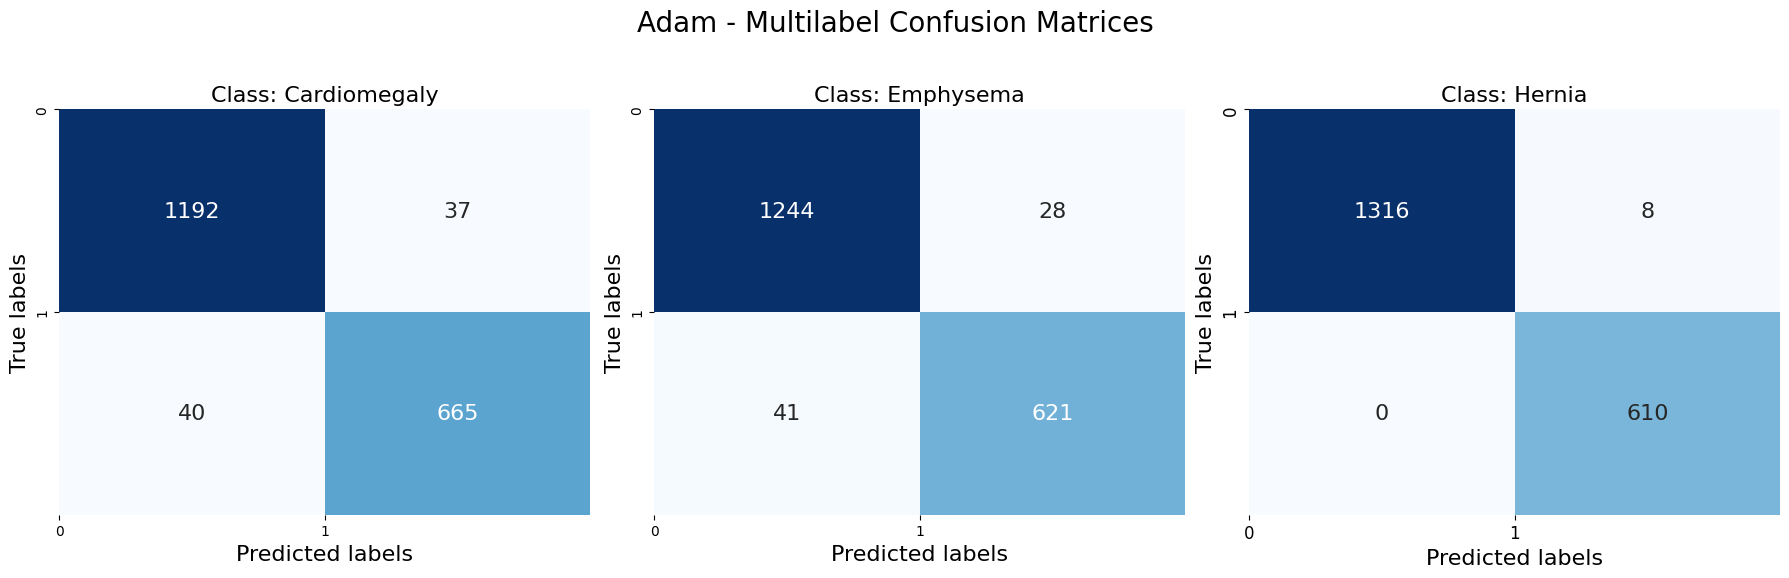

In [171]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multilabel_confusion_matrices(mcm, class_labels, title="Multilabel Confusion Matrices", figsize=(18, 6), fontsize=16):
    num_classes = len(mcm)
    fig, axes = plt.subplots(1, num_classes, figsize=figsize)

    for i, (cm, ax) in enumerate(zip(mcm, axes)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, annot_kws={"fontsize": fontsize})
        ax.set_title(f'Class: {class_labels[i]}', fontsize=fontsize)
        ax.set_xlabel('Predicted labels', fontsize=fontsize)
        ax.set_ylabel('True labels', fontsize=fontsize)
        ax.grid(False)
        ax.xaxis.set(ticks=np.arange(2), ticklabels=['0', '1'])
        ax.yaxis.set(ticks=np.arange(2), ticklabels=['0', '1'])

    plt.suptitle(title, fontsize=fontsize+4)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.yticks(fontsize=12)  # Increase y-axis tick labels font size
    plt.xticks(fontsize=12)
    plt.show()

# Example multilabel confusion matrix

class_labels = ["Cardiomegaly", "Emphysema", "Hernia"]

# Call the function
mcm1=multilabel_confusion_matrix(Y_test,y_pred_1)
plot_multilabel_confusion_matrices(mcm1, class_labels, title="Adam - Multilabel Confusion Matrices", figsize=(18, 6), fontsize=16)


In [106]:
inaccurately_classified=1-aucc_score0
print("inaccurately classified = ",inaccurately_classified*100, " %")

inaccurately classified =  4.808686659772487  %


In [132]:
from sklearn.metrics import log_loss , roc_curve
log_loss(Y_test, y_pred_1)

c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


1.3221476215713635

In [133]:
#calculate accuaracy for each class
from sklearn.metrics import accuracy_score
acc=[]
for i, n in enumerate(class_3):
    acc.append(accuracy_score(Y_test[:,i], y_pred_1[:,i]))
print(acc)

[0.9601861427094105, 0.9643226473629782, 0.9958634953464323]


In [134]:
#calculate AUC , precision , recall , F1 score for each class
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score
auc=[]
precision=[]
recall=[]
f1=[]
for i, n in enumerate(class_3):
    auc.append(roc_auc_score(Y_test[:,i], y_pred_1[:,i]))
    precision.append(precision_score(Y_test[:,i], y_pred_1[:,i]))
    recall.append(recall_score(Y_test[:,i], y_pred_1[:,i]))
    f1.append(f1_score(Y_test[:,i], y_pred_1[:,i]))
print(auc)
print(precision)
print(recall)
print(f1)

[0.9565783171465009, 0.9580269433202228, 0.9969788519637462]
[0.9472934472934473, 0.9568567026194145, 0.9870550161812298]
[0.9432624113475178, 0.9380664652567976, 1.0]
[0.945273631840796, 0.9473684210526315, 0.993485342019544]


<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x17a2573d010>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

Text(0.5, 0, 'Class')

Text(0, 0.5, 'AUC Score')

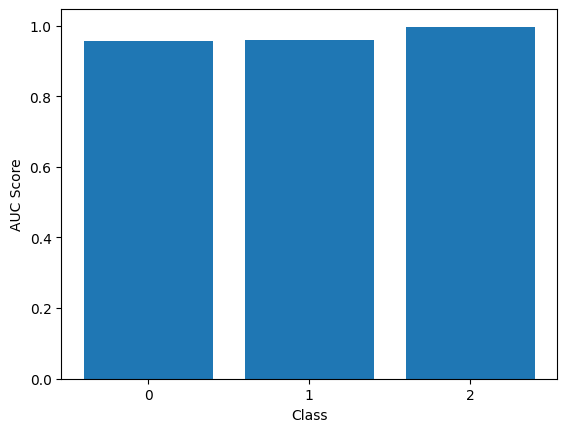

In [135]:
n_classes = y_true.shape[1] # Number of classes
auc_scores = []
for i in range(n_classes):
    auc_score = roc_auc_score(Y_test[:, i], y_pred_1[:, i])
    auc_scores.append(auc_score)

# Plot the AUC scores for each class
plt.bar(range(n_classes), auc_scores)
plt.xticks(range(n_classes))
plt.xlabel('Class')
plt.ylabel('AUC Score')
plt.show()

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

def get_roc_curve(labels, predicted_vals, title="ROC curve"):
    auc_roc_vals = []
    optimal_thresholds = []
    sensitivity = []
    specificity = []
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(labels)):
        try:
            gt = Y_test[:, i] 
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr, tpr, thresholds = roc_curve(gt, pred)
            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            y_pred = pred > optimal_threshold
            acc = accuracy_score(gt, y_pred)
            prec = precision_score(gt, y_pred)
            rec = recall_score(gt, y_pred)
            f1_s = f1_score(gt, y_pred)
            accuracy.append(acc)
            precision.append(prec)
            recall.append(rec)
            f1.append(f1_s)
            optimal_thresholds.append(optimal_threshold)
            optimal_tpr = round(tpr[optimal_idx], 3)
            optimal_1_fpr = round(1 - fpr[optimal_idx], 3)
            sensitivity.append(optimal_tpr)
            specificity.append(1 - fpr[optimal_idx])
            plt.figure(1, figsize=(8, 8))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr, tpr,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate', fontsize=15)  # Increase font size
            plt.ylabel('True positive rate', fontsize=15)  # Increase font size
            plt.yticks(fontsize=12)  # Increase y-axis tick labels font size
            plt.xticks(fontsize=12)
            plt.title(title, fontsize=16)  # Increase font size
            plt.legend(loc='best', fontsize=16)  # Increase font size
        except Exception as e:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.show()
    return auc_roc_vals, optimal_thresholds, sensitivity, specificity, accuracy, precision, recall, f1


c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


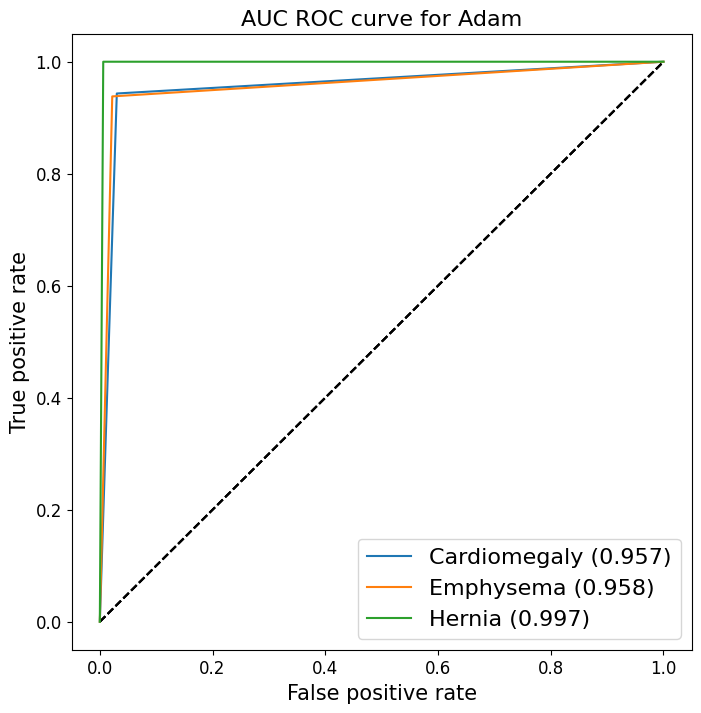

In [168]:
auc_rocs, thresholds, sensitivity, specificity, accuracy, precision, recall, f1 = get_roc_curve(class_3, y_pred_1,"AUC ROC curve for Adam")

c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


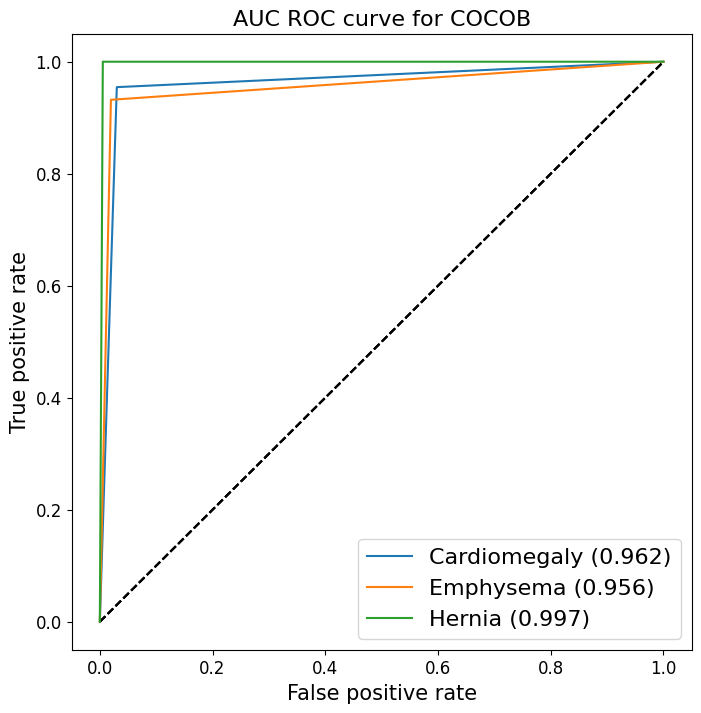

In [169]:
auc_rocs, thresholds, sensitivity, specificity, accuracy, precision, recall, f1 = get_roc_curve(class_3, y_pred_2,'AUC ROC curve for COCOB')

c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


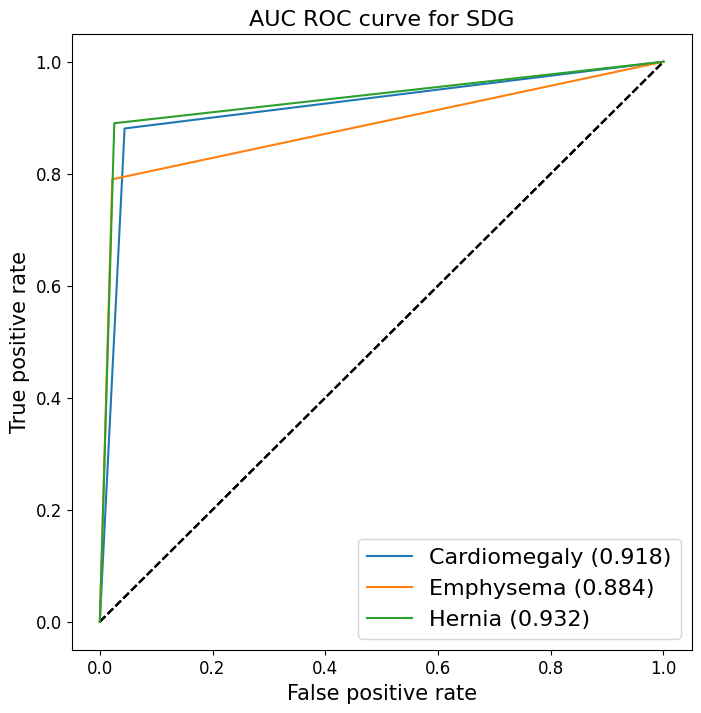

In [187]:
auc_rocs, thresholds, sensitivity, specificity, accuracy, precision, recall, f1 = get_roc_curve(class_3, y_pred_3,'AUC ROC curve for SDG')

### Opt 1 model2 - COCOB

In [153]:
model_2=model(3152,2)

In [154]:
t1_cocob=time.time()
his2=model_2.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10,batch_size=8)
t2_cocob=time.time()
T2=t2_cocob-t1_cocob
print("Time taken by COCOB optimizer is : ", T2," sec")

Epoch 1/10
725/725 [==============================] - 46s 62ms/step - loss: 0.1737 - accuracy: 0.9159 - auc_1: 0.9830 - precision_1: 0.9311 - recall_1: 0.9134 - binary_accuracy: 0.9475 - true_positives_1: 5409.0000 - true_negatives_1: 11078.0000 - false_positives_1: 400.0000 - false_negatives_1: 513.0000 - val_loss: 0.1078 - val_accuracy: 0.9338 - val_auc_1: 0.9920 - val_precision_1: 0.9568 - val_recall_1: 0.9191 - val_binary_accuracy: 0.9583 - val_true_positives_1: 1817.0000 - val_true_negatives_1: 3743.0000 - val_false_positives_1: 82.0000 - val_false_negatives_1: 160.0000
Epoch 2/10
725/725 [==============================] - 44s 61ms/step - loss: 0.0839 - accuracy: 0.9509 - auc_1: 0.9934 - precision_1: 0.9604 - recall_1: 0.9493 - binary_accuracy: 0.9694 - true_positives_1: 5622.0000 - true_negatives_1: 11246.0000 - false_positives_1: 232.0000 - false_negatives_1: 300.0000 - val_loss: 0.0874 - val_accuracy: 0.9457 - val_auc_1: 0.9932 - val_precision_1: 0.9613 - val_recall_1: 0.9545 -

In [155]:
pred_2=model_2.predict(X_test)

61/61 [==============================] - 0s 5ms/step


In [156]:
y_pred_2=np.where(pred_2>0.5,1,0)

In [157]:
val=[]
for i, n in enumerate(class_3):
  val.append(matthews_corrcoef(Y_test[:,1], y_pred_2[:,1]))
avg_val=np.mean(val)

In [158]:
aucc_score1=accuracy_score(Y_test,y_pred_2)
Macro_precision_score1=precision_score(Y_test, y_pred_2, average = 'macro')
macro_averaged_recall1 = recall_score(Y_test, y_pred_2, average = 'macro')
macro_averaged_f11 = f1_score(Y_test, y_pred_2, average = 'macro')
roc_auc1=roc_auc_score(Y_test, y_pred_2, average = 'macro', multi_class = 'ovr')
jaccard_sc1=jaccard_score(Y_test, y_pred_2, labels=None,average='samples')
matthews_coff1=avg_val

In [159]:
print("Accuracy Score: ",aucc_score1)
print("Macro Precision Score: ",Macro_precision_score1)
print("Macro Recall Score: ",macro_averaged_recall1)
print("Macro F1 Score: ",macro_averaged_f11)
print("ROC AUC Score: ",roc_auc1)
print("Jaccard Score: ",jaccard_sc1)
print("Matthews Correlation Coefficient: ",matthews_coff1)
print(classification_report(Y_test, y_pred_2, target_names=class_3))

Accuracy Score:  0.9560496380558429
Macro Precision Score:  0.9658670983913887
Macro Recall Score:  0.9622113660874346
Macro F1 Score:  0.963950265348791
ROC AUC Score:  0.9719312040156716
Jaccard Score:  0.9601861427094105
Matthews Correlation Coefficient:  0.9192736564691413
              precision    recall  f1-score   support

Cardiomegaly       0.95      0.95      0.95       705
   Emphysema       0.96      0.93      0.95       662
      Hernia       0.99      1.00      0.99       610

   micro avg       0.96      0.96      0.96      1977
   macro avg       0.97      0.96      0.96      1977
weighted avg       0.96      0.96      0.96      1977
 samples avg       0.96      0.96      0.96      1977



c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


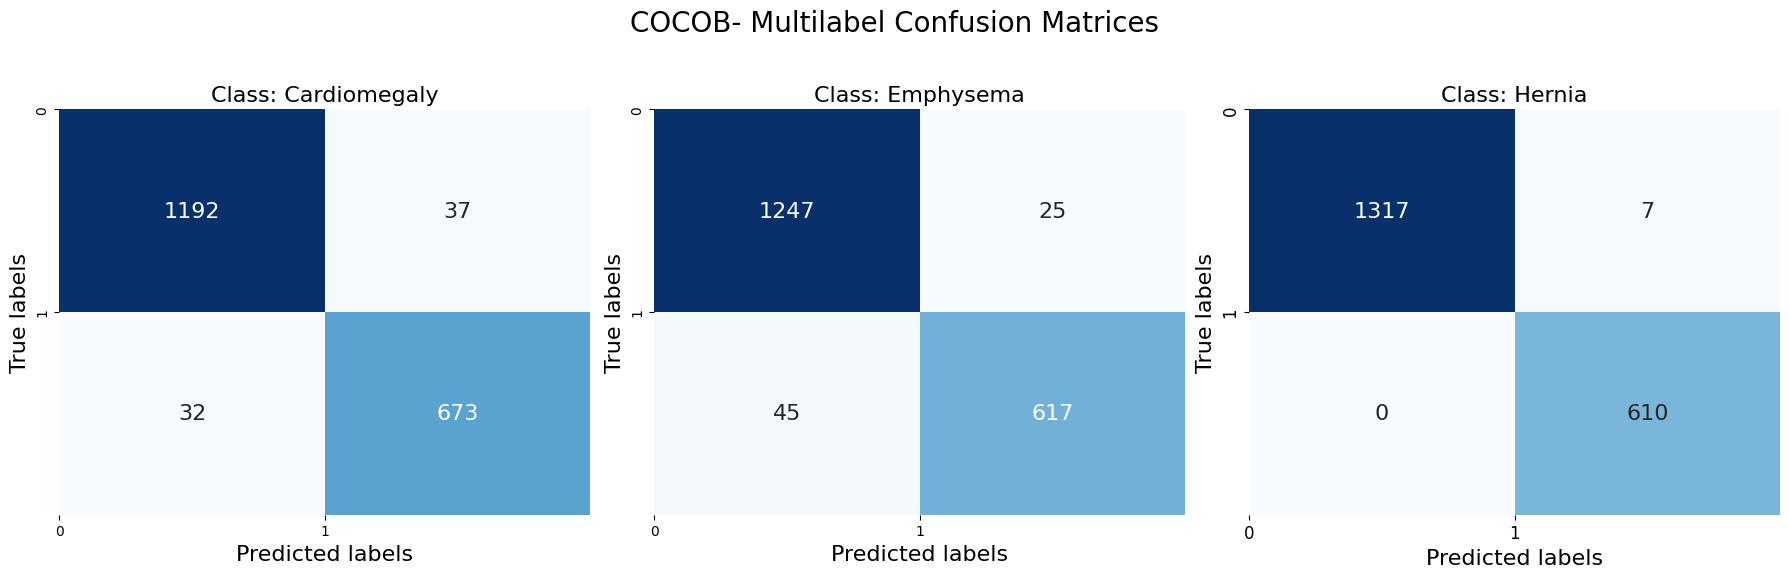

In [172]:
mcm2=multilabel_confusion_matrix(Y_test,y_pred_2)
plot_multilabel_confusion_matrices(mcm2, class_labels, title="COCOB- Multilabel Confusion Matrices", figsize=(18, 6), fontsize=16)

In [173]:
# calculate accuracy , precision , recall , F1 score , AUC for each class
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
auc=[]
precision=[]
recall=[]
f1=[]
accurcay=[]
for i, n in enumerate(class_3):
    auc.append(roc_auc_score(Y_test[:,i], y_pred_2[:,i]))
    precision.append(precision_score(Y_test[:,i], y_pred_2[:,i]))
    recall.append(recall_score(Y_test[:,i], y_pred_2[:,i]))
    f1.append(f1_score(Y_test[:,i], y_pred_2[:,i]))
    accurcay.append(accuracy_score(Y_test[:,i], y_pred_2[:,i]))
print(auc)
print(precision)
print(recall)
print(f1)
print(accurcay)

[0.9622520760117491, 0.9561850405669877, 0.9973564954682779]
[0.9478873239436619, 0.9610591900311527, 0.9886547811993517]
[0.9546099290780142, 0.93202416918429, 1.0]
[0.9512367491166078, 0.946319018404908, 0.9942950285248574]
[0.9643226473629782, 0.9638055842812823, 0.9963805584281282]


In [174]:
inaccurately_classified=1-aucc_score1
print("inaccurately classified = ",inaccurately_classified*100, " %")

inaccurately classified =  4.395036194415713  %


### opt3 model3 - SDG

In [175]:
model3=model(3152,3)

In [176]:
t1_sdg=time.time()
his3=model3.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=10,batch_size=8,callbacks=callbacks)
t2_sdg=time.time()
T3=t2_sdg-t1_sdg
print("Time taken by SDG optimizer is : ", T3," sec")

Epoch 1/10
725/725 [==============================] - 14s 19ms/step - loss: 0.4688 - accuracy: 0.8088 - auc_2: 0.9155 - precision_2: 0.9204 - recall_2: 0.4649 - binary_accuracy: 0.8042 - true_positives_2: 2753.0000 - true_negatives_2: 11240.0000 - false_positives_2: 238.0000 - false_negatives_2: 3169.0000 - val_loss: 0.3642 - val_accuracy: 0.8697 - val_auc_2: 0.9729 - val_precision_2: 0.9764 - val_recall_2: 0.6915 - val_binary_accuracy: 0.8892 - val_true_positives_2: 1367.0000 - val_true_negatives_2: 3792.0000 - val_false_positives_2: 33.0000 - val_false_negatives_2: 610.0000 - lr: 1.0000e-04
Epoch 2/10
725/725 [==============================] - 14s 19ms/step - loss: 0.3158 - accuracy: 0.8845 - auc_2: 0.9746 - precision_2: 0.9603 - recall_2: 0.7509 - binary_accuracy: 0.9047 - true_positives_2: 4447.0000 - true_negatives_2: 11294.0000 - false_positives_2: 184.0000 - false_negatives_2: 1475.0000 - val_loss: 0.2827 - val_accuracy: 0.8785 - val_auc_2: 0.9769 - val_precision_2: 0.9462 - val

In [177]:
pred_3=model3.predict(X_test)

61/61 [==============================] - 0s 6ms/step


In [178]:
y_pred_3=np.where(pred_3>0.5,1,0)

In [179]:
val=[]
for i, n in enumerate(class_3):
  val.append(matthews_corrcoef(Y_test[:,1], y_pred_3[:,1]))
avg_val=np.mean(val)

In [180]:
aucc_score2=accuracy_score(Y_test,y_pred_3)
Macro_precision_score2=precision_score(Y_test, y_pred_3, average = 'macro')
macro_averaged_recall2 = recall_score(Y_test, y_pred_3, average = 'macro')
macro_averaged_f12 = f1_score(Y_test, y_pred_3, average = 'macro')
roc_auc2=roc_auc_score(Y_test, y_pred_3, average = 'macro', multi_class = 'ovr')
jaccard_sc2=jaccard_score(Y_test, y_pred_3, labels=None,average='samples')
matthews_coff2=avg_val

In [181]:
print("Accuracy Score: ",aucc_score2)
print("Macro Precision Score: ",Macro_precision_score2)
print("Macro Recall Score: ",macro_averaged_recall2)
print("Macro F1 Score: ",macro_averaged_f12)
print("ROC AUC Score: ",roc_auc2)
print("Jaccard Score: ",jaccard_sc2)
print("Matthews Correlation Coefficient: ",matthews_coff2)
print(classification_report(Y_test, y_pred_3, target_names=class_3))

Accuracy Score:  0.8407445708376422
Macro Precision Score:  0.9367526088273933
Macro Recall Score:  0.8536817365787931
Macro F1 Score:  0.8924121187370834
ROC AUC Score:  0.9115691186175466
Jaccard Score:  0.8536711478800414
Matthews Correlation Coefficient:  0.8073407094931314
              precision    recall  f1-score   support

Cardiomegaly       0.92      0.88      0.90       705
   Emphysema       0.95      0.79      0.86       662
      Hernia       0.94      0.89      0.91       610

   micro avg       0.94      0.85      0.89      1977
   macro avg       0.94      0.85      0.89      1977
weighted avg       0.94      0.85      0.89      1977
 samples avg       0.86      0.86      0.86      1977



c:\Users\zshash\anaconda3\envs\torch\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [182]:
inaccurately_classified=1-aucc_score2
print("inaccurately classified = ",inaccurately_classified*100, " %")

inaccurately classified =  15.92554291623578  %


In [183]:
auc=[]
precision=[]
recall=[]
f1=[]
accurcay=[]
for i, n in enumerate(class_3):
    auc.append(roc_auc_score(Y_test[:,i], y_pred_3[:,i]))
    precision.append(precision_score(Y_test[:,i], y_pred_3[:,i]))
    recall.append(recall_score(Y_test[:,i], y_pred_3[:,i]))
    f1.append(f1_score(Y_test[:,i], y_pred_3[:,i]))
    accurcay.append(accuracy_score(Y_test[:,i], y_pred_3[:,i]))
print(auc)
print(precision)
print(recall)
print(f1)
print(accurcay)

[0.9184564513615981, 0.8840088164320052, 0.9322420880590363]
[0.92, 0.9491833030852994, 0.9410745233968805]
[0.8808510638297873, 0.7900302114803626, 0.8901639344262295]
[0.9, 0.8623248145094806, 0.9149115417017691]
[0.9286452947259566, 0.9136504653567735, 0.9477766287487074]


<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x17a2c790410>,
 [Text(0, 0, 'Adam'), Text(1, 0, 'COCOB'), Text(2, 0, 'SDG')])

Text(0, 0.5, 'Time in sec')

Text(0.5, 1.0, 'Time taken by each optimizer for 10 epochs')

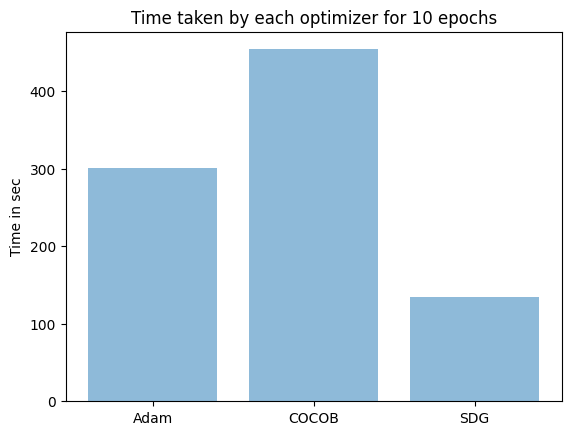

In [184]:
# plot graph of time taken by each optimizer
import matplotlib.pyplot as plt
import numpy as np
objects = ('Adam', 'COCOB', 'SDG')
y_pos = np.arange(len(objects))
performance = [T1,T2,T3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time in sec')
plt.title('Time taken by each optimizer for 10 epochs')
plt.show()

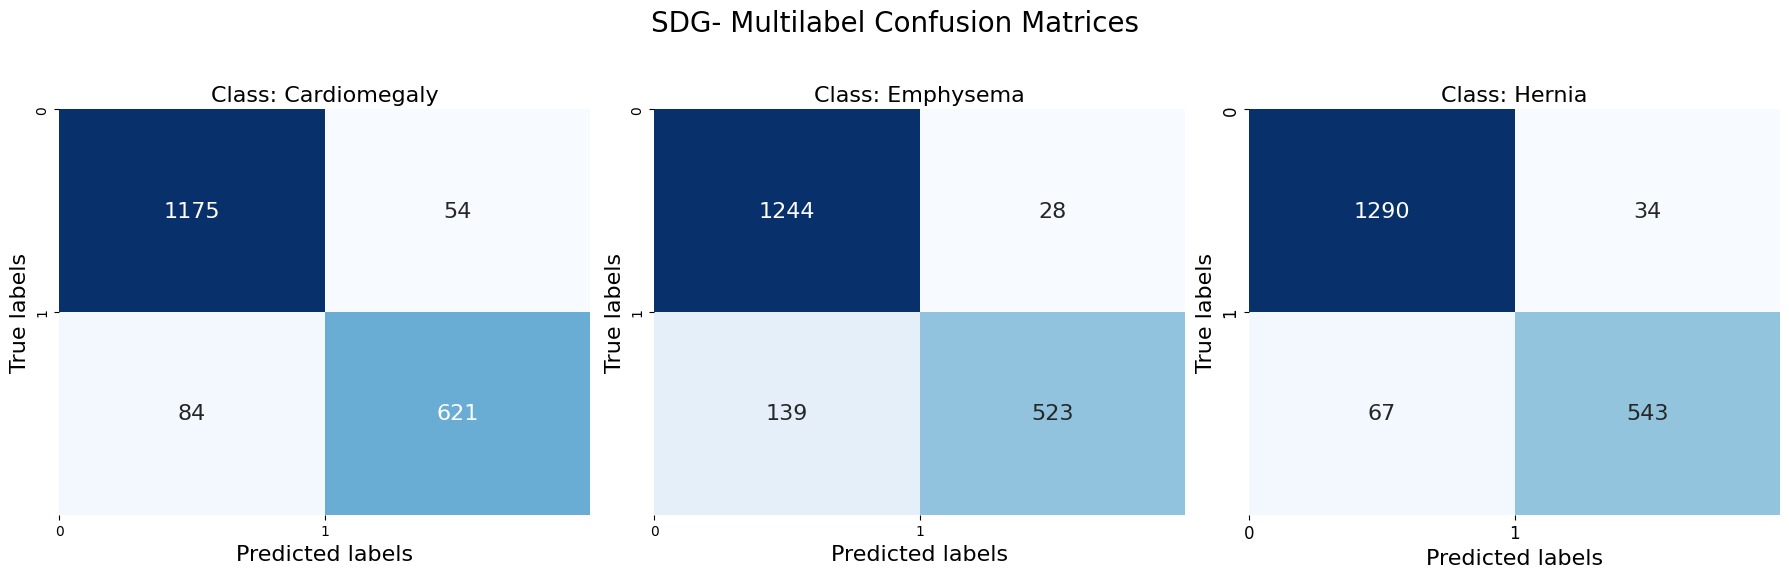

In [188]:
mcm3=multilabel_confusion_matrix(Y_test,y_pred_3)
plot_multilabel_confusion_matrices(mcm3, class_labels, title="SDG- Multilabel Confusion Matrices", figsize=(18, 6), fontsize=16)

In [186]:
graph_auc1=his1.history['auc_1']
graph_auc2=his2.history['auc_2']
graph_auc3=his3.history['auc_3']

KeyError: 'auc_1'

In [189]:
#4 plot AUC of each optimizer and each class with epochs in spectrum plot
import matplotlib.pyplot as plt
import numpy as np

objects = ('Adam', 'COCOB', 'SDG')
epochs=[1,2,3,4,5,6,7,8,9,10]
plt.plot(epochs, graph_auc1, 'b', label='Adam')
plt.plot(epochs, graph_auc2, 'g', label='COCOB')
plt.plot(epochs, graph_auc3, 'r', label='SDG')

# Set chart title and axis labels
plt.title('AUC Metric with Epoch')
plt.xlabel('Epoch')
plt.ylabel('AUC')

# Add legend to chart
plt.legend()
plt.show()

NameError: name 'graph_auc1' is not defined

Text(0.5, 0, 'optimizers')

Text(0, 0.5, 'Accuracy')

[Text(0.25, 0, 'Adam'), Text(1.25, 0, 'COCOB'), Text(2.25, 0, 'SDG')]

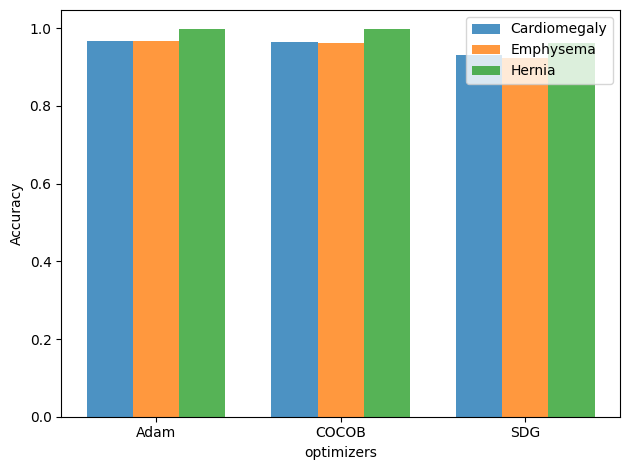

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define the data
model_names = ['Adam', 'COCOB', 'SDG']
class_names = ['Cardiomegaly', 'Emphysema', 'Hernia']
accuracies = [[0.9658738366080661, 0.9663908996897621, 0.9968976215098242], [0.9653567735263702, 0.9617373319544984, 0.9968976215098242], [0.9301964839710445, 0.9239917269906929, 0.9622543950361944]]

# create the bar plot
fig, ax = plt.subplots()
index = np.arange(len(model_names))
bar_width = 0.25
opacity = 0.8

for i in range(len(class_names)):
    rects = ax.bar(index + i * bar_width, [accuracy[i] for accuracy in accuracies], bar_width,
                   alpha=opacity, label=class_names[i])

# customize the plot
ax.set_xlabel('optimizers')
ax.set_ylabel('Accuracy Score')
ax.set_xticks(index + ((len(class_names) - 1) / 2) * bar_width)
ax.set_xticklabels(model_names)
ax.legend()

plt.tight_layout()
plt.show()
